In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import librosa
from IPython.display import Audio

## Preprocessing

In [2]:

DATASET_PATH = r"C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3\data_extraction\data_previews"

train_data = []
for path in glob.iglob(os.path.join(DATASET_PATH, "*.mp3")):
    video_id = path.split("\\")[-1]
    video_id = video_id.split("_")[-1]
    video_id = video_id.split(".")[0]
    train_data.append({"track_id":video_id, "path": path})
    
    
train_data = pd.DataFrame(train_data)
train_data.head(10)

,track_id,path
0,1jBmW1fRXgLhy1XwE0SJTN,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
1,0r0UDwngm74U5ccMQ9gMBM,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
2,1mnqraQ8oV8MX92rdOFLWW,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
3,15DwFznkBJir7AK9PyMyRR,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
4,0qgrrDnUUhyxpxbBznUnzg,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
5,13aKGvTil3UUw1yk0pA9fG,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
6,1HlGblweLq0eAwnb0NY1EQ,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
7,0Mft55GDMuD2rFnrSeFn3U,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
8,0CZ8lquoTX2Dkg7Ak2inwA,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
9,13EqDaY8tAIrf0dmLdSPmU,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...


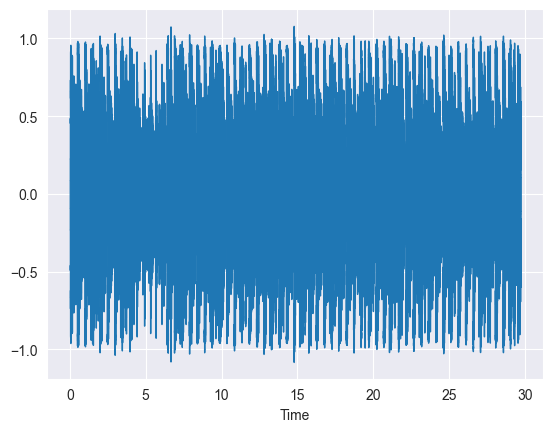

In [4]:
audio_test_path = train_data["path"][3]
y, sr = librosa.load(audio_test_path)
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

## Processing

In [ ]:
def getFeatures_measures(paths):
    features = []
    # get a single feature vector for each audio file
    for path in paths:
        y, sr = librosa.load(path)
        tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        features.append([tempo, np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr), np.mean(mfcc)])
    return features